# Import modules

In [1]:
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

# Etape 1

# Import the data 

Vous utiliserez de nouveaux algorithmes tels que des arbres de décision, des forêts aléatoires et des machines vectorielles de support.

In [41]:
df_arbres = pd.read_csv('./data/arbres_grenoble_epsg4326.csv')
df_arbres.head()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
1,34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
2,34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
3,34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
4,34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


In [42]:
df_arbres.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'equipe',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'collectivite',
       'stationmetro', 'hauteurarbre', 'portarbre', 'structure', 'forme',
       'typenature', 'geo_point_2d'],
      dtype='object')

## View missing values using seaborn heatmap

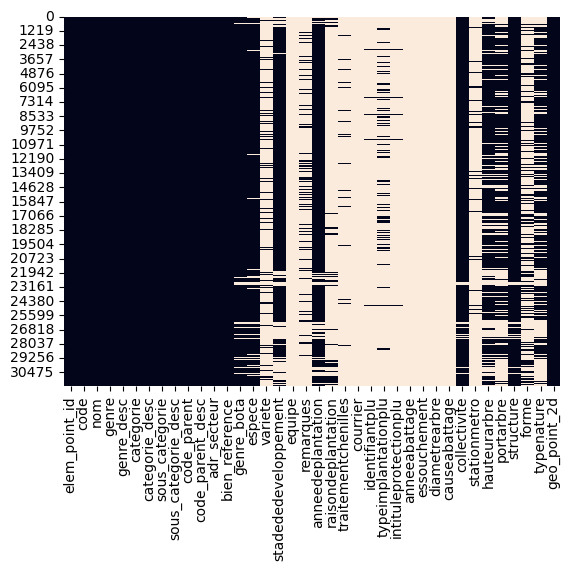

In [43]:
sns.heatmap(df_arbres.isna(), cbar=False, xticklabels=True)
plt.show()

## View missing values using missingno module

### Create matrix of missing values

<Axes: >

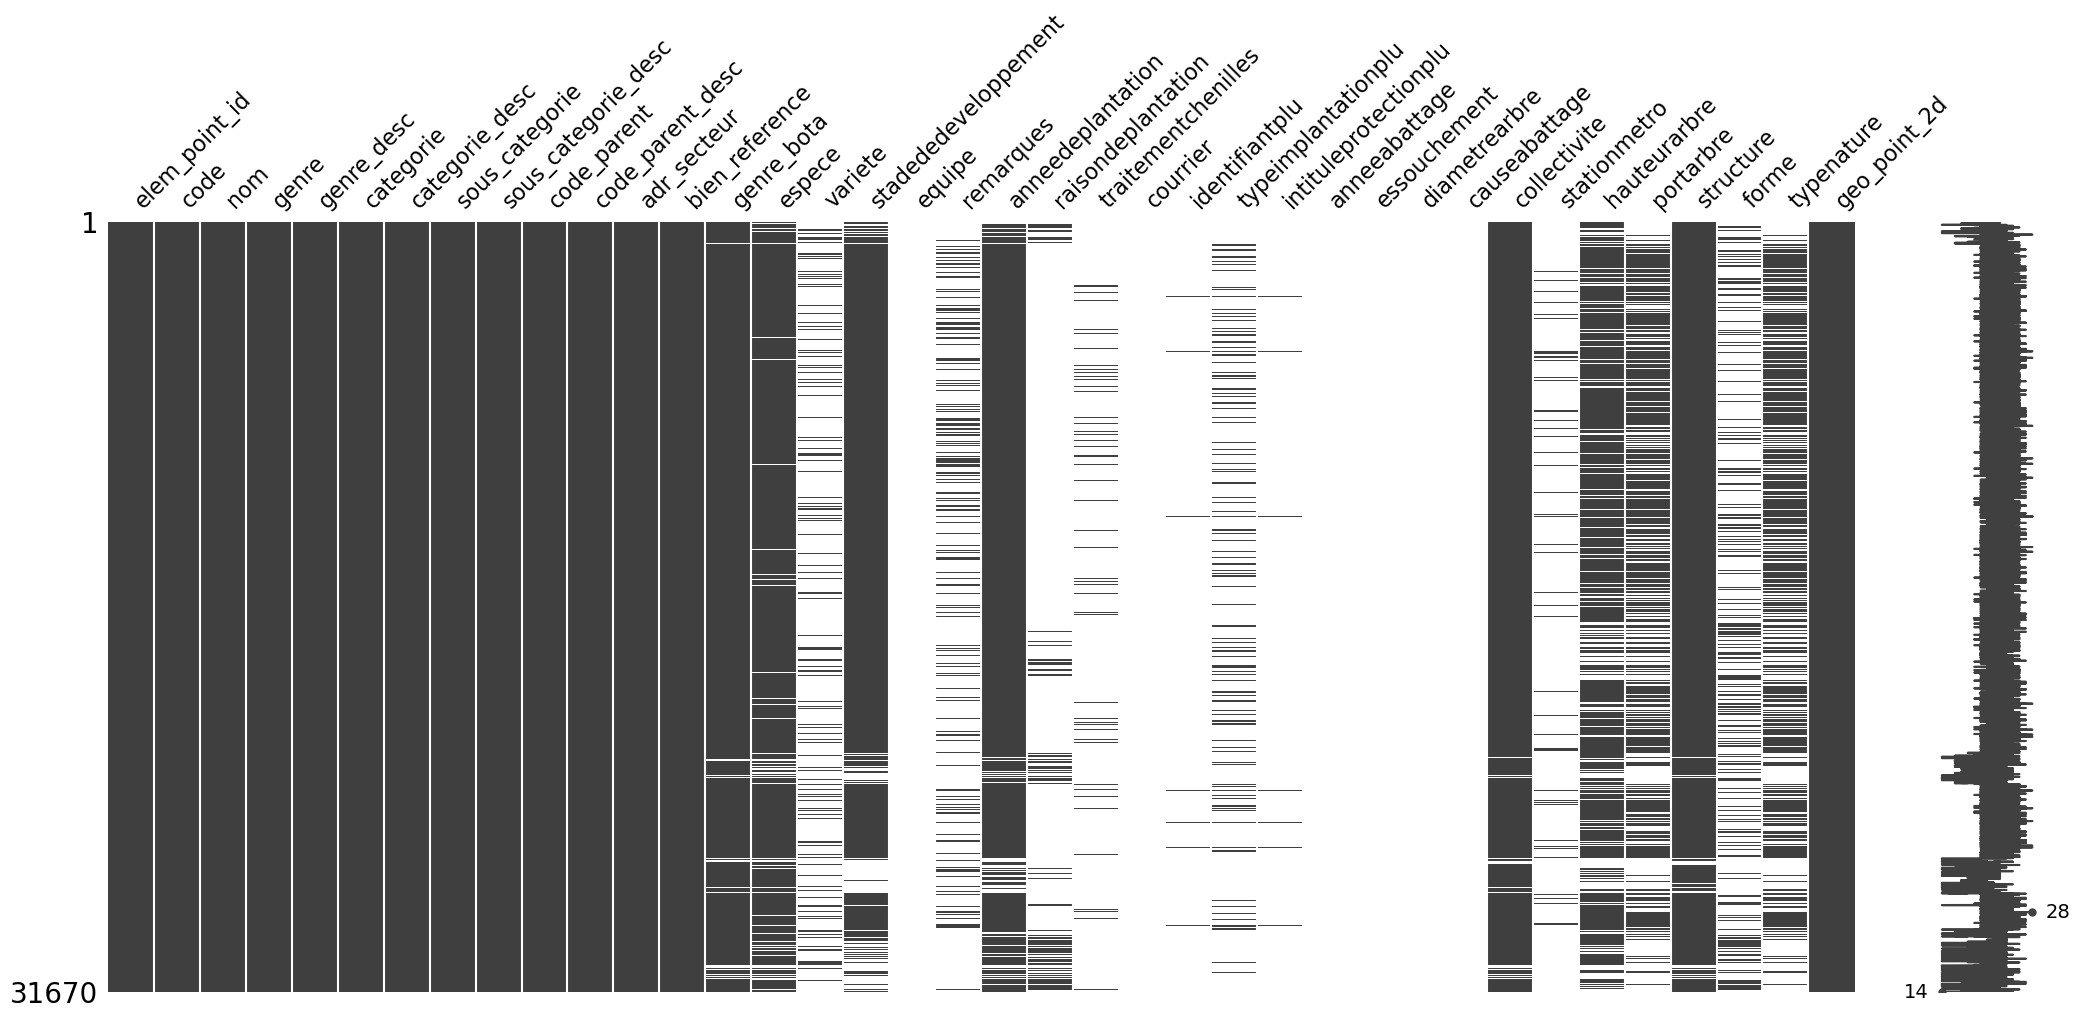

In [44]:
msno.matrix(df_arbres)

### Create heatmap that shows the correlation between columns

<Axes: >

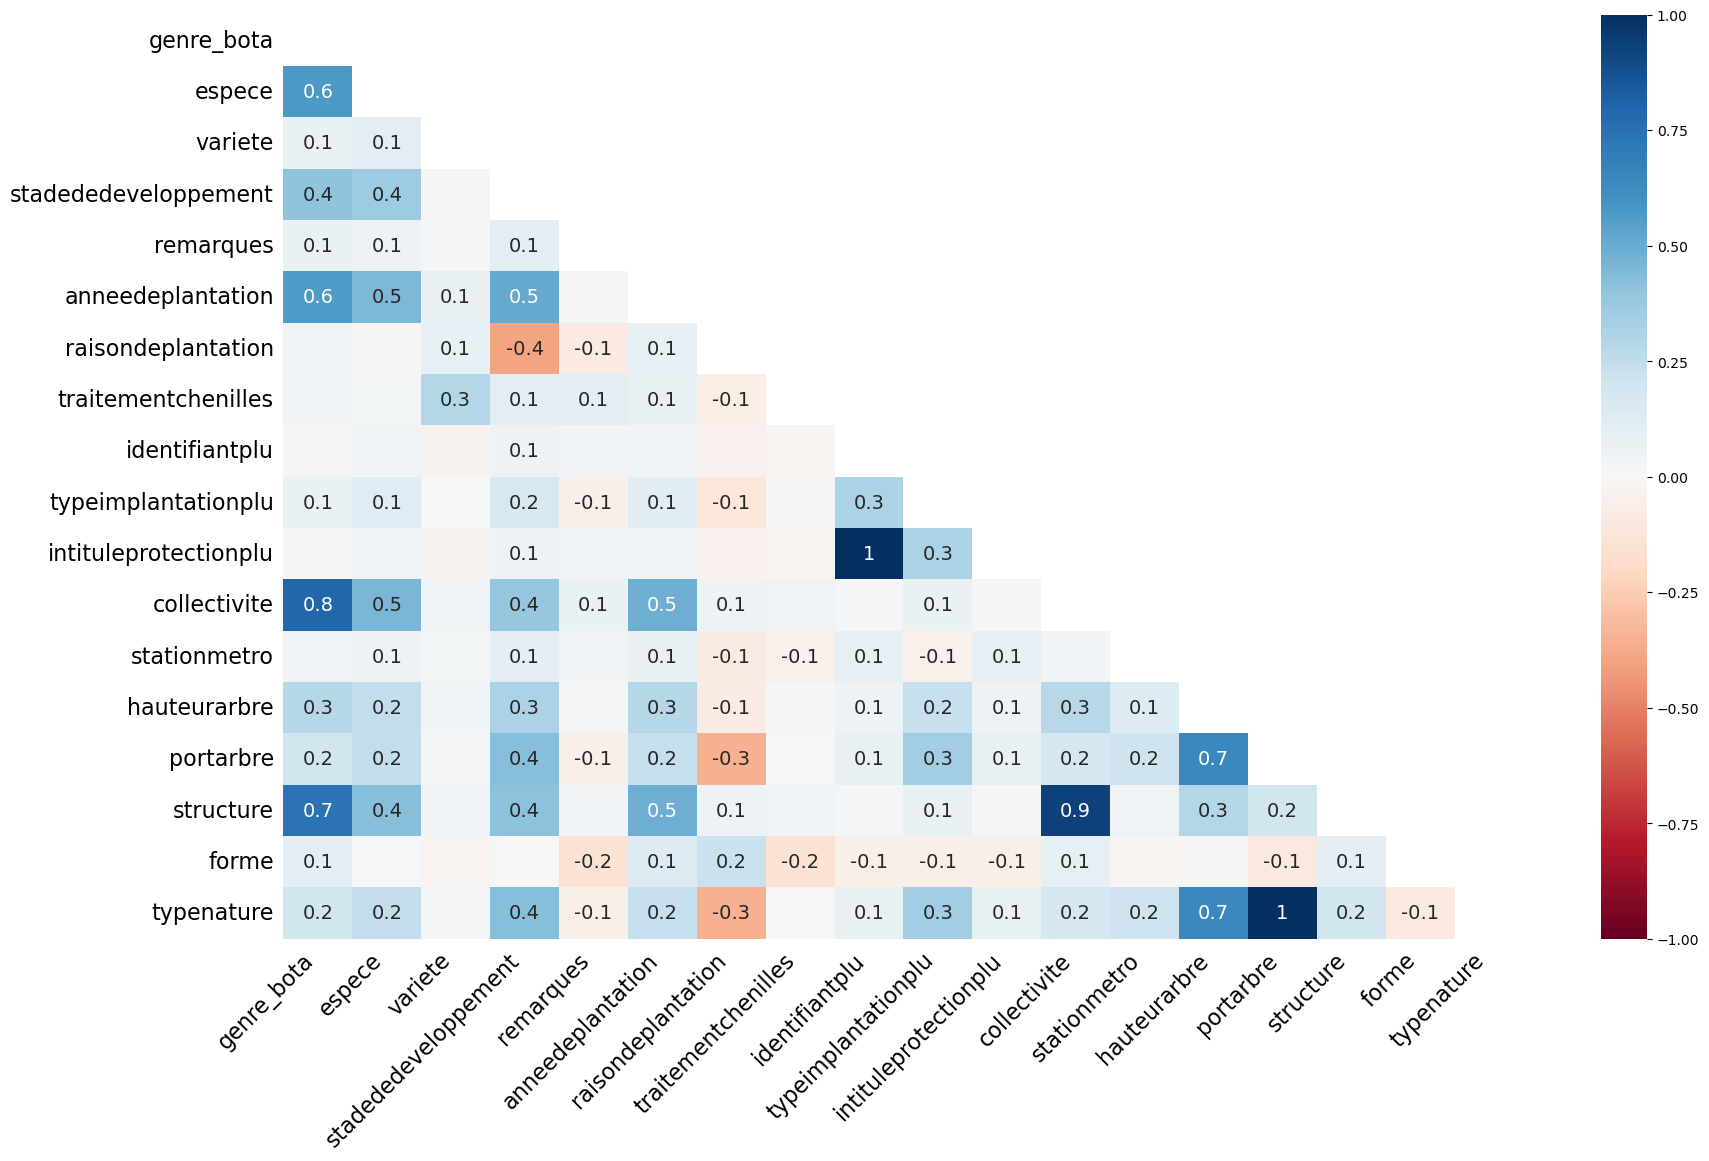

In [45]:
msno.heatmap(df_arbres)

### Create dendogram that shows the relationship between columns

<Axes: >

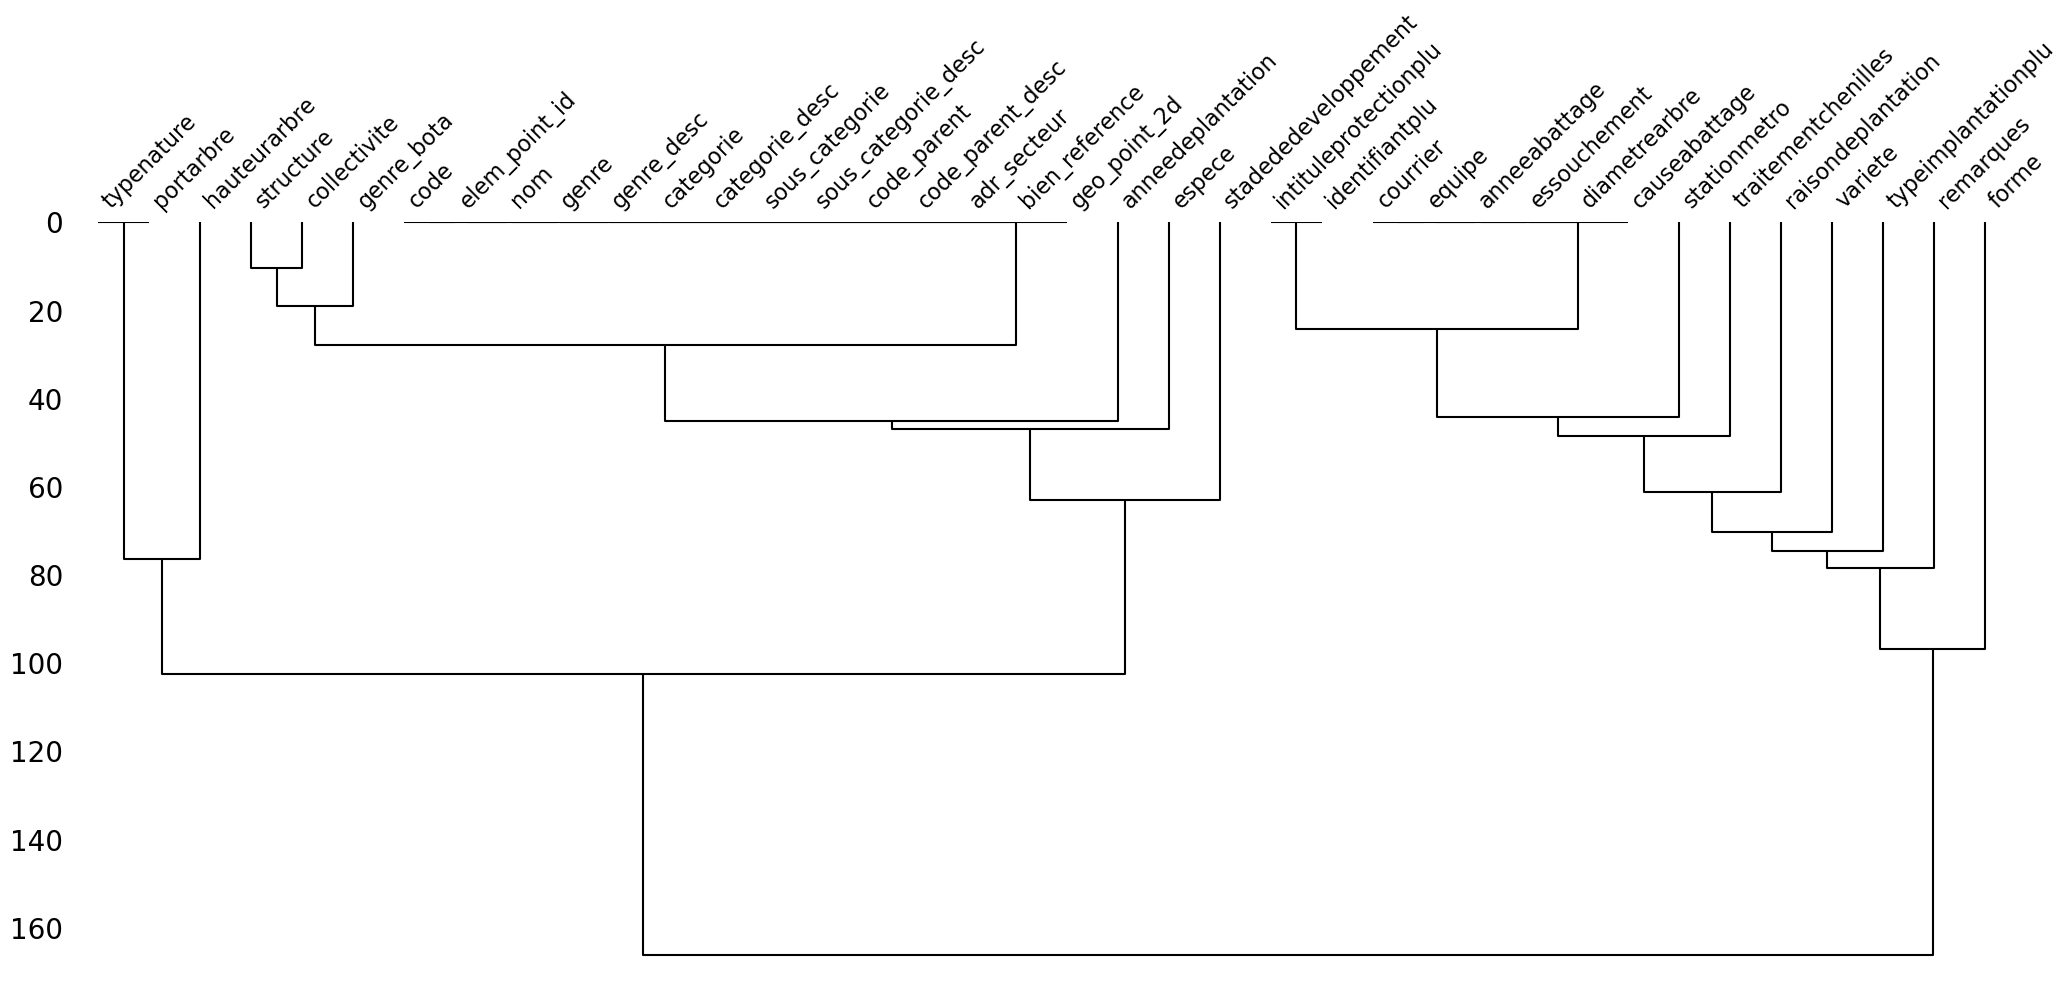

In [46]:
msno.dendrogram(df_arbres)

### Create bar chart that shows the number of missing values per column

<Axes: >

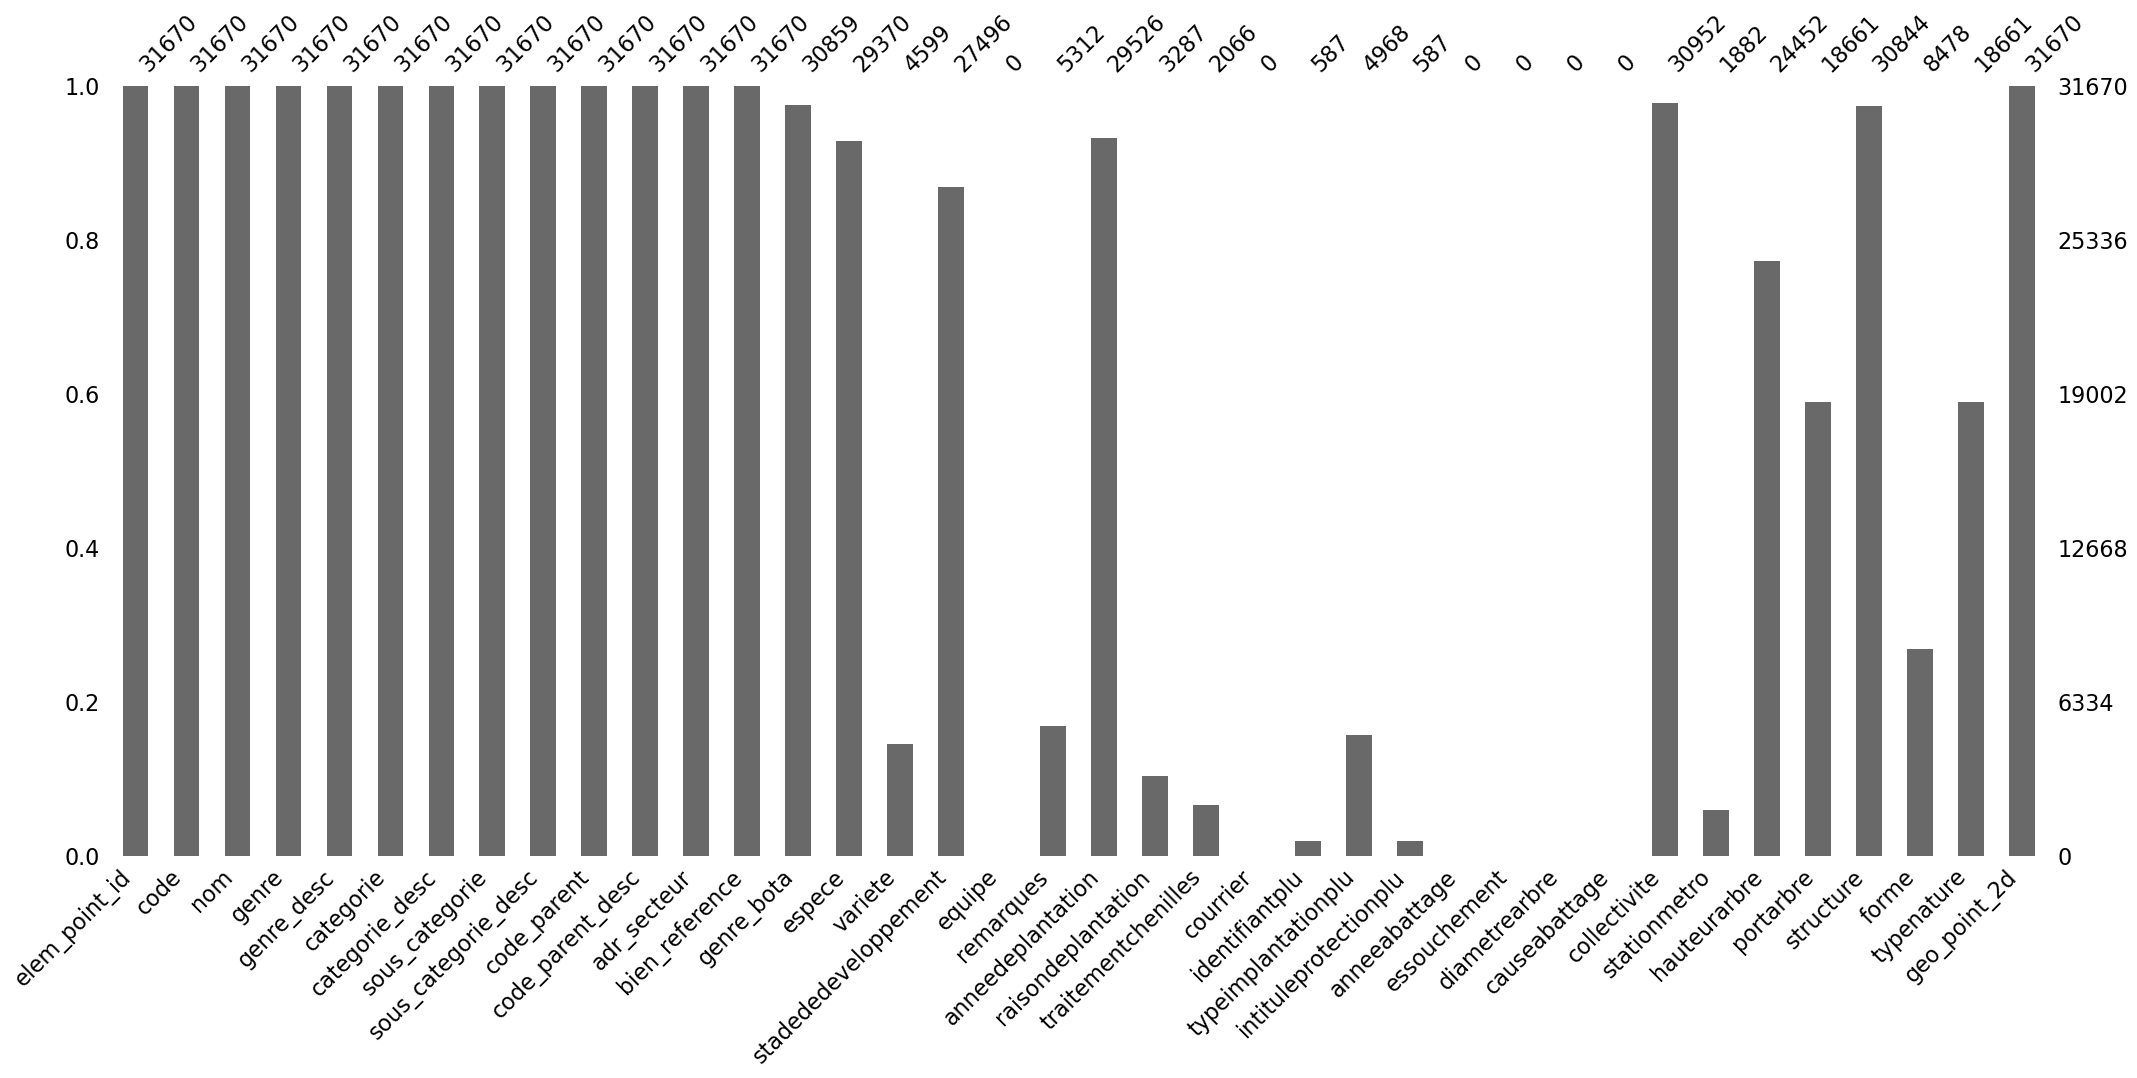

In [47]:
msno.bar(df_arbres)

## Drop empty columns and drop rows that are empty in anneedeplantation

### Remove empty columns

In [48]:
'''
remove columns that are empty 
empty columns: ['causeabattage', 'anneeabattage', 'diametrearbre',
                'equipe', 'essouchement', 'courrier']
'''
df_arbres = df_arbres.dropna(how='any', axis=0, subset='anneedeplantation')


### Drop empty values in anneedeplantation

In [49]:
'''
drop empty values in anneedeplantation
'''
df_arbres.dropna(how='all', axis=1, inplace=True)
df_arbres.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'remarques',
       'anneedeplantation', 'raisondeplantation', 'traitementchenilles',
       'identifiantplu', 'typeimplantationplu', 'intituleprotectionplu',
       'collectivite', 'stationmetro', 'hauteurarbre', 'portarbre',
       'structure', 'forme', 'typenature', 'geo_point_2d'],
      dtype='object')

### Drop columns with only one or two unique values

In [51]:
len(df_arbres['collectivite'].unique())

3

In [52]:
for col in df_arbres.columns:
    print(len(df_arbres[col].unique()))

29526
29526
29526
1
1
1
1
4
4
1462
1462
11
29526
119
283
218
4
2859
68
4
4
43
5
4
3
3
4
7
5
4
7
29526


In [53]:
'''
drop columns with less than one or two unique value
'''

for col in df_arbres.columns:
    if (len(df_arbres[col].unique()) <= 2):
        df_arbres = df_arbres.drop(col, axis=1)

### Drop columns that are missing a large amount of data

In [54]:
df_arbres.isna().sum()/len(df_arbres)

elem_point_id            0.000000
code                     0.000000
nom                      0.000000
sous_categorie           0.000000
sous_categorie_desc      0.000000
code_parent              0.000000
code_parent_desc         0.000000
adr_secteur              0.000000
bien_reference           0.000000
genre_bota               0.001355
espece                   0.041082
variete                  0.847694
stadededeveloppement     0.084942
remarques                0.830353
anneedeplantation        0.000000
raisondeplantation       0.889589
traitementchenilles      0.930028
identifiantplu           0.980119
typeimplantationplu      0.831877
intituleprotectionplu    0.980119
collectivite             0.003184
stationmetro             0.936260
hauteurarbre             0.196031
portarbre                0.378988
structure                0.005080
forme                    0.716826
typenature               0.378988
geo_point_2d             0.000000
dtype: float64

In [55]:
col_drop = (df_arbres.isna().sum()/len(df_arbres))[(df_arbres.isna().sum()/len(df_arbres))>0.7].index.values
col_drop

array(['variete', 'remarques', 'raisondeplantation',
       'traitementchenilles', 'identifiantplu', 'typeimplantationplu',
       'intituleprotectionplu', 'stationmetro', 'forme'], dtype=object)

In [56]:
df_arbres = df_arbres.drop(col_drop, axis=1)

### Drop columns missing only a little data?

In [57]:
print('Length of df:', len(df_arbres))
df_arbres.isna().sum()

Length of df: 29526


elem_point_id               0
code                        0
nom                         0
sous_categorie              0
sous_categorie_desc         0
code_parent                 0
code_parent_desc            0
adr_secteur                 0
bien_reference              0
genre_bota                 40
espece                   1213
stadededeveloppement     2508
anneedeplantation           0
collectivite               94
hauteurarbre             5788
portarbre               11190
structure                 150
typenature              11190
geo_point_2d                0
dtype: int64

#### Let's look at the portarbre column

In [58]:
df_arbres.portarbre.nunique()

6

In [59]:
df_arbres.portarbre.value_counts()

portarbre
Libre           9132
Semi-libre      8596
Architecturé     542
Pleureur          55
Pyramidale        10
Têtard             1
Name: count, dtype: int64

#### Let's look at the typenature column

In [60]:
df_arbres.typenature.nunique()

6

In [61]:
df_arbres.typenature.value_counts()

typenature
Libre           9132
Semi-libre      8596
Architecturé     542
Pleureur          55
Pyramidale        10
Têtard             1
Name: count, dtype: int64

##### the two columns are the same! 
also the data really only adds two categories so will start without the data


In [62]:
df_arbres = df_arbres.drop(['typenature'], axis=1)
# df_arbres = df_arbres.drop(['portarbre', 'typenature'], axis=1)
df_arbres.head()

,elem_point_id,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,portarbre,structure,geo_point_2d
0,34835,ESP36318,AR36318,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,5,AR36318,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,"45.167098421885385,5.740131798404362"
1,34836,ESP36319,AR36319,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,5,AR36319,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,"45.16710682038838,5.740199792549315"
2,34837,ESP36320,AR36320,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,5,AR36320,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,"45.167115270975415,5.740265608803635"
3,34838,ESP36321,AR36321,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,5,AR36321,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,"45.16712715617142,5.740349032579623"
4,34839,ESP36322,AR36322,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,5,AR36322,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,"45.167144245872265,5.740471081600832"


### Look at information about the data set again

<Axes: >

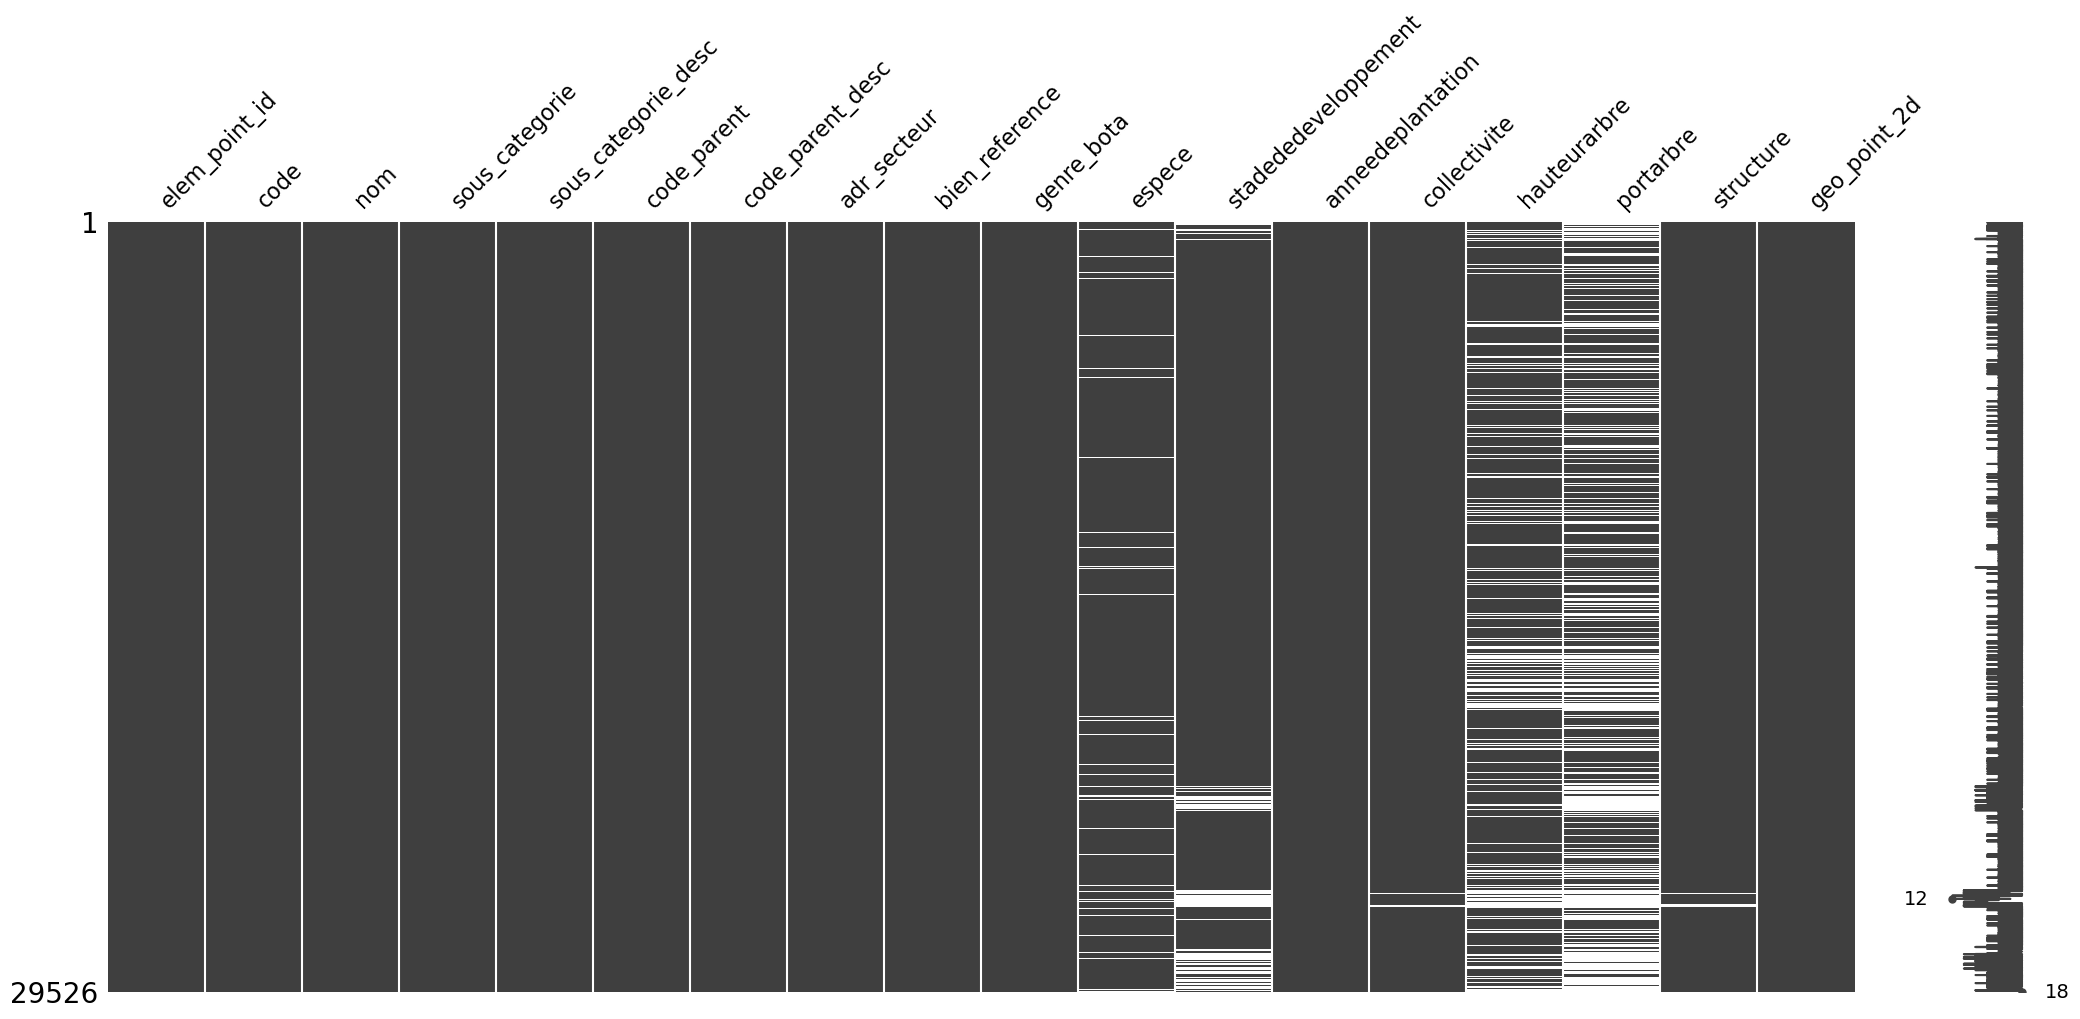

In [63]:
msno.matrix(df_arbres)

In [64]:
"""
calculate catergorical description statistics for all variables

    count: number of values in the column.
    unique: number of unique values in the column.
    top: the value that occurs the most in the column.
    freq: the number of times the top value occurs.

"""
df_arbres.astype('object').describe()

,elem_point_id,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,portarbre,structure,geo_point_2d
count,29526,29526,29526,29526,29526,29526,29526,29526,29526,29486,28313,27018,29526.0,29432,23738,18336,29376,29526
unique,29526,29526,29526,4,4,1462,1462,11,29526,118,282,3,68.0,2,3,6,4,29526
top,34835,ESP36318,AR36318,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,6,AR36318,Acer,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,de 10 m à 20 m,Libre,Métropole de Grenoble,"45.167098421885385,5.740131798404362"
freq,1,1,1,14345,14345,369,369,6430,1,4862,3797,19776,3367.0,15059,11418,9132,14352,1


In [65]:
# calculate description statistics for numerical variables
df_arbres.describe()

,elem_point_id,adr_secteur,anneedeplantation
count,29526.000000,29526.000000,29526.000000
mean,19457.333299,248.442085,1990.445099
std,12124.077712,3047.759858,18.174352
min,1.000000,1.000000,1900.000000
25%,9289.750000,2.000000,1975.000000
50%,18707.500000,4.000000,1987.000000
75%,28133.750000,5.000000,2006.000000
max,48322.000000,38421.000000,2024.000000


### Split latitude and longitude into seperate columns

In [66]:
df_arbres[['latitude', 'longitude']] = df_arbres['geo_point_2d'].str.split(',', expand=True)
df_arbres['latitude'] = df_arbres['latitude'].str.strip().astype('float')
df_arbres['longitude'] = df_arbres['longitude'].str.strip().astype('float')
df_arbres = df_arbres.drop('geo_point_2d', axis=1)

### Visualize correlation heat map to see if any other columns can be removed

<Axes: >

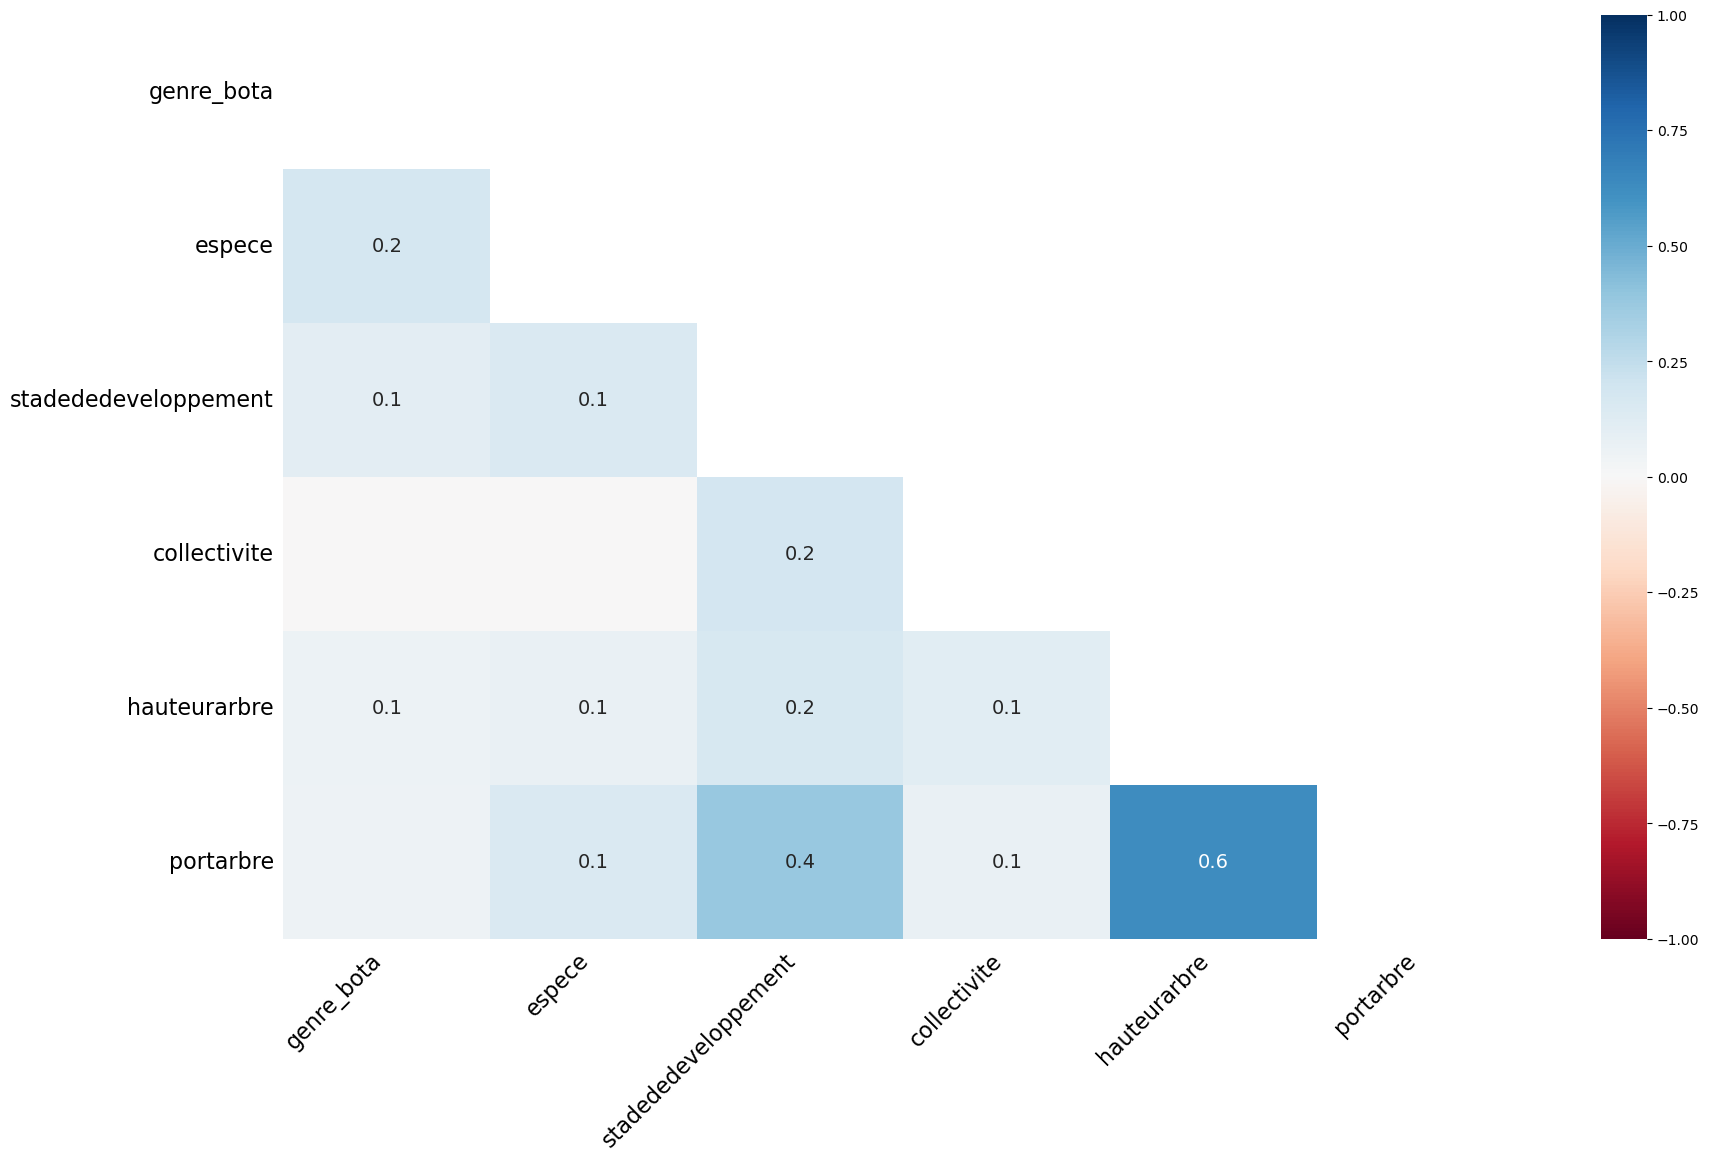

In [74]:
msno.heatmap(df_arbres)

In [73]:
# remove the structure column since it is correlated with collectivite
df_arbres = df_arbres.drop('structure', axis=1)

KeyError: "['structure'] not found in axis"

### Drop columns where all the data is unique

In [69]:
df_arbres.loc[:, df_arbres.nunique() == len(df_arbres)]

,elem_point_id,code,nom,bien_reference,latitude,longitude
0,34835,ESP36318,AR36318,AR36318,45.167098,5.740132
1,34836,ESP36319,AR36319,AR36319,45.167107,5.740200
2,34837,ESP36320,AR36320,AR36320,45.167115,5.740266
3,34838,ESP36321,AR36321,AR36321,45.167127,5.740349
4,34839,ESP36322,AR36322,AR36322,45.167144,5.740471
...,...,...,...,...,...,...
31662,44732,ESP40741,AR40741,AR40741,45.190866,5.719434
31663,44733,ESP40742,AR40742,AR40742,45.190877,5.719507
31664,44734,ESP40743,AR40743,AR40743,45.190898,5.719652
31665,44741,ESP40744,AR40744,AR40744,45.191309,5.721605


In [70]:
col_unique = ['elem_point_id', 'code', 'nom', 'bien_reference']

In [75]:
# remove the structure column since it is correlated with collectivite
df_arbres = df_arbres.drop(col_unique, axis=1)

KeyError: "['elem_point_id', 'code', 'nom', 'bien_reference'] not found in axis"

In [76]:
df_arbres.nunique()

sous_categorie              4
sous_categorie_desc         4
code_parent              1462
code_parent_desc         1462
adr_secteur                11
genre_bota                118
espece                    282
stadededeveloppement        3
anneedeplantation          68
collectivite                2
hauteurarbre                3
portarbre                   6
latitude                29526
longitude               29526
dtype: int64

### Drop redundant columns
Ex: description columns that are already encoded in another column

In [77]:
col_dup = ['sous_categorie_desc', 'code_parent_desc']

In [78]:
# remove the structure column since it is correlated with collectivite
df_arbres = df_arbres.drop(col_dup, axis=1)

### Encode the geo data

In [36]:
col_geo = ['latitude', 'longitude']

In [37]:
# # creates 5 clusters using hierarchical clustering.
# agc = AgglomerativeClustering(n_clusters =5, metric='euclidean', linkage='ward')
# df_arbres['geo'] = agc.fit_predict(df_arbres[col_geo])

In [38]:
# (df_arbres[['longitude', 'latitude', 'geo']].plot(kind='scatter',
#                                                   x='longitude',
#                                                   y='latitude',
#                                                   c='geo'))

# plt.show()

In [39]:
# df_arbres = df_arbres.drop(['latitude', 'longitude'], axis=1)

## Save cleaned dataframe as pickle

In [79]:
df_arbres.to_pickle('./data/arbres.pkl')